## MULTIPLE LINEAR REGRESSION ON "BOSTON HOUSING NORMALIZE"

### 1.Import the Required Liabraries

In [1]:
import numpy as np                   #used to solve a matrix problem
import pandas as pd                  #data manipulation and analysis
import matplotlib.pyplot as plt      #its used for data visulization
import seaborn as sns                #its making statistical graphics in python

### 2.Load the Dataset

In [2]:
#read the data from the given data 
df=pd.read_csv('BostonHousing.csv')

### 3.Basic Information of the DataFrame

In [3]:
# Check the Shape (Rows * Columns) of DataFrame
df.shape

(506, 14)

In [4]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [5]:
#check Datatype of features
df.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

### View the Categorical Features only

In [6]:
df.dtypes[df.dtypes=='object']

Series([], dtype: object)

### view the numarical features

In [7]:
df.dtypes[df.dtypes!='object']

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

In [8]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [9]:
#Display the Last 5 rows of DataFrame
df.tail()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [10]:
#It Displays Randomly 2o rows of DataFrame
df.sample(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
125,0.16902,0.0,25.65,0,0.581,5.986,88.4,1.9929,2,188,19.1,385.02,14.81,21.4
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9
180,0.06588,0.0,2.46,0,0.488,7.765,83.3,2.7410,3,193,17.8,395.56,7.56,39.8
267,0.57834,20.0,3.97,0,0.575,8.297,67.0,2.4216,5,264,13.0,384.54,7.44,50.0
353,0.01709,90.0,2.02,0,0.410,6.728,36.1,12.1265,5,187,17.0,384.46,4.50,30.1
413,28.65580,0.0,18.10,0,0.597,5.155,100.0,1.5894,24,666,20.2,210.97,20.08,16.3
404,41.52920,0.0,18.10,0,0.693,5.531,85.4,1.6074,24,666,20.2,329.46,27.38,8.5
101,0.11432,0.0,8.56,0,0.520,6.781,71.3,2.8561,5,384,20.9,395.58,7.67,26.5
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
241,0.10612,30.0,4.93,0,0.428,6.095,65.1,6.3361,6,300,16.6,394.62,12.40,20.1


In [11]:

#It display Statistical Information in the Dataset
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [12]:
# Check Columns that has NULLs
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

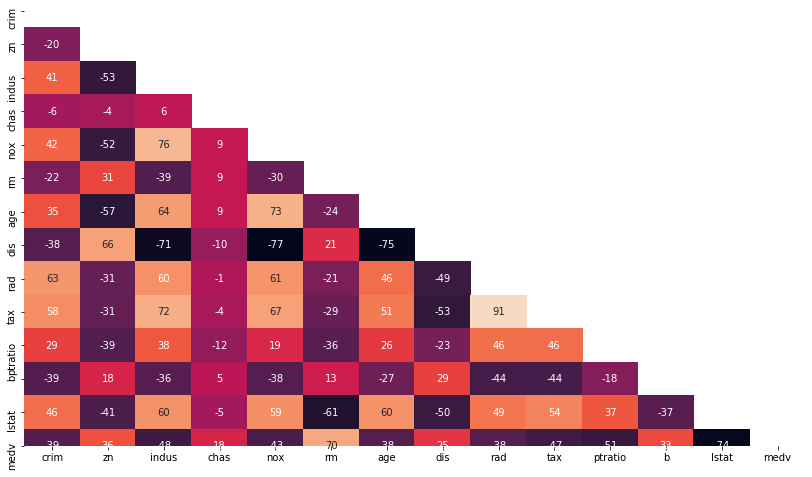

In [13]:
# Plot Seaborn Heatmap on Feature Correlations 
correlations = df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(14, 8))
sns.heatmap(correlations*100, annot=True, fmt='.0f', cbar=False, mask=mask)
plt.show()

### 4. Create seperate objects for TARGET & INPUT features

In [14]:
target_feature = 'medv'

# Separate object for target feature
y = df[target_feature]

# Separate Object for Input Features
X = df.drop(target_feature, axis=1)

In [15]:
num_features = df.dtypes[df.dtypes != 'object'].index
num_features

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [16]:
len(num_features)

14

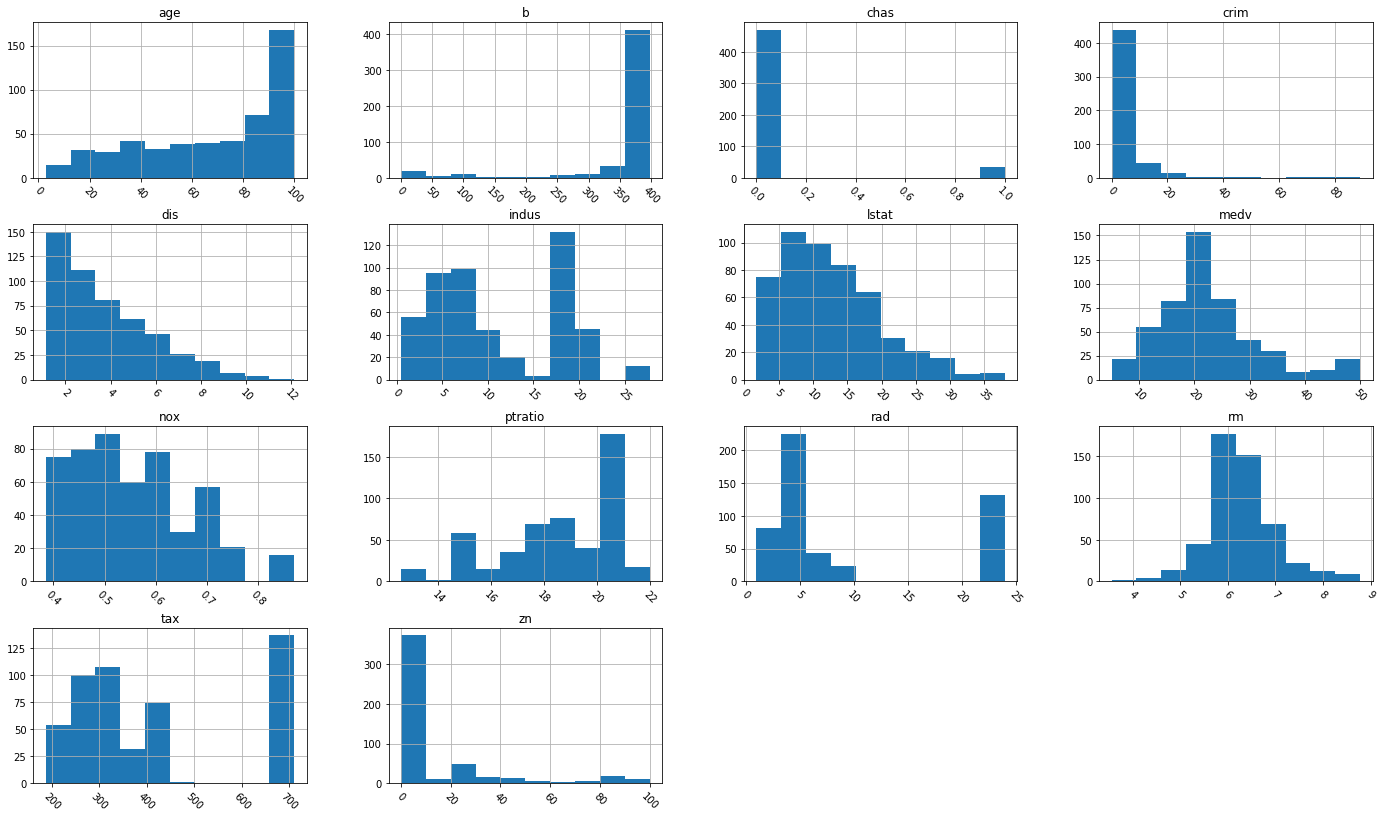

In [17]:
# Plot histogram grid
df[num_features].hist(xrot=-45, figsize=(24, 14))
plt.show()

# NORMALIZE

In [18]:
from sklearn.preprocessing import Normalizer
import pandas as pd

In [19]:
scaler = Normalizer()

In [20]:
scaler.fit(X)

Normalizer(copy=True, norm='l2')

In [21]:
nX = scaler.transform(X)

### 5. Create TRAIN & TEST Datasets

In [22]:
# Function for splitting training and test set
from sklearn.model_selection import train_test_split

In [23]:
# Split X and y into train and test sets
nX_train, nX_test, y_train, y_test = train_test_split(nX, y, test_size=0.3, random_state=1)

In [24]:
#Check the shape of training and testing Data onIndependent variable
nX_train.shape, nX_test.shape

((354, 13), (152, 13))

### 6.Build the Linear Regression Model

In [25]:
#This technique findout a Linear relationship between x(input)and y(output) 
from sklearn.linear_model import LinearRegression

In [26]:
#Call the Linear Regression function
MLR=LinearRegression()

In [27]:
MLR.fit(nX_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 7. Apply the Model on Test Dataset

In [28]:
#Apply model on x_test then we will get a predicted values
y_pred=MLR.predict(nX_test)

In [29]:
#Display the shape of predicted values
y_pred.shape

(152,)

#### Compare the actual output values with the predicted values

In [30]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred,'variance':y_test-y_pred}) 
df.head()

,Actual,Predicted,variance
307,28.2,32.412455,-4.212455
343,23.9,27.292423,-3.392423
47,16.6,17.583449,-0.983449
67,22.0,21.048724,0.951276
362,20.8,18.494182,2.305818


### Get the Parameters

In [31]:
MLR.coef_

array([-8.34515860e+01,  1.99333139e+01,  3.74411768e+01,  1.09329993e+03,
       -6.48586390e+03,  2.42166244e+03,  9.49392533e-01, -5.17540275e+02,
        1.01056423e+02, -5.85410595e+00, -3.89670126e+02,  4.19411218e+00,
       -2.63468717e+02])

In [32]:
MLR.intercept_

22.457715292385778

### Evaluating the Algorithm

The final step is to evaluate the performance of algorithm. 
This step is particularly important to compare how well different algorithms perform on a particular dataset. 
For regression algorithms, three evaluation metrics are commonly used:

    1) R^2 Score
    2)Mean Absolute Error (MAE) is the mean of the absolute value of the errors
    2) Mean Squared Error (MSE) is the mean of the squared errors 
    3) Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors

In [33]:
# evaluate the model through r2_value
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score*100,'%')

80.34133141234851 %


In [34]:
# Perform K-fold Cross Validation (KFold=5)
from sklearn.model_selection import cross_val_score
print(cross_val_score(MLR,X,y,cv=5))
accuracy=cross_val_score(MLR,X,y,cv=5).mean()
print ("Cross Validated Scores is:",accuracy * 100,'%')

[ 0.63919994  0.71386698  0.58702344  0.07923081 -0.25294154]
Cross Validated Scores is: 35.32759243958735 %


In [35]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.167491379652155
Mean Squared Error: 18.01805186505474
Root Mean Squared Error: 4.244767586694794
